In [1]:
import numpy as np
import tensorflow as tf
from time import gmtime, strftime
import time
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import model
import utils
%matplotlib inline


In [2]:
run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth=True

config = type("Foo", (object,), {})()
config.dataset = 'celebA'
config.batch_size = 64

#with tf.Session(config=run_config) as sess:
sess = tf.Session(config=run_config) 
dcgan = model.DCGAN(
    sess,
    input_height=108,
    input_width=108,
    output_width=64,
    output_height=64,
    batch_size=config.batch_size,
    sample_num=64,
    dataset_name='celebA',
    input_fname_pattern='*.jpg',
    crop=True, #true for training
    checkpoint_dir='checkpoint',
    sample_dir='samples'
)

if not dcgan.load('checkpoint')[0]:
    print('Cannot find checkpoint!')

utils.show_all_variables()


 [*] Reading checkpoints...
checkpoint\celebA_64_64_64
INFO:tensorflow:Restoring parameters from checkpoint\celebA_64_64_64\DCGAN.model-32502
 [*] Success to read DCGAN.model-32502
---------
Variables: name (type shape) [size]
---------
generator/g_h0_lin/Matrix:0 (float32_ref 100x8192) [819200, bytes: 3276800]
generator/g_h0_lin/bias:0 (float32_ref 8192) [8192, bytes: 32768]
generator/g_bn0/beta:0 (float32_ref 512) [512, bytes: 2048]
generator/g_bn0/gamma:0 (float32_ref 512) [512, bytes: 2048]
generator/g_h1/w:0 (float32_ref 5x5x256x512) [3276800, bytes: 13107200]
generator/g_h1/biases:0 (float32_ref 256) [256, bytes: 1024]
generator/g_bn1/beta:0 (float32_ref 256) [256, bytes: 1024]
generator/g_bn1/gamma:0 (float32_ref 256) [256, bytes: 1024]
generator/g_h2/w:0 (float32_ref 5x5x128x256) [819200, bytes: 3276800]
generator/g_h2/biases:0 (float32_ref 128) [128, bytes: 512]
generator/g_bn2/beta:0 (float32_ref 128) [128, bytes: 512]
generator/g_bn2/gamma:0 (float32_ref 128) [128, bytes: 51

In [3]:
def get_mask(file):
    image = imread(file)
    a = image[:,:,0]
    b = a/np.max(a)
    c = np.rint(b)
    return c

def deprocess_image(img):
    return np.clip(255 * (img+0.5), 0.0, 255.0).astype(np.uint8)


In [4]:
z_sample = np.random.uniform(-0.5, 0.5, size=(config.batch_size, dcgan.z_dim))

In [8]:
"""
z_mask = np.ones([dcgan.z_dim]) # 100
h0_mask = np.ones([dcgan.gf_dim*8]) # 512 
h1_mask = np.ones([dcgan.gf_dim*4]) # 256
h2_mask = np.ones([dcgan.gf_dim*2]) # 128 
h3_mask = np.ones([dcgan.gf_dim*1]) # 64
h4_mask = np.ones([dcgan.c_dim]) # 3
"""
z_mask = np.ones([dcgan.z_dim])
#z_mask = np.reshape(get_mask('./masks/mask10.png'), (-1))
h0_mask = np.ones([int(dcgan.output_height/16), int(dcgan.output_width/16)]) # 4, 4
h1_mask = np.ones([int(dcgan.output_height/8), int(dcgan.output_width/8)]) # 8, 8
h2_mask = np.ones([int(dcgan.output_height/4), int(dcgan.output_width/4)]) # 16, 16
h3_mask = np.ones([int(dcgan.output_height/2), int(dcgan.output_width/2)]) # 32, 32
h4_mask = np.ones([int(dcgan.output_height), int(dcgan.output_width)]) # 64, 64


# z_mask = np.reshape(get_mask('./masks/mask10person.png'), (-1))
#z_mask = np.reshape(get_mask('./masks/mask10.png'), (-1))
h0_mask = get_mask('./masks/mask4.png')
#h1_mask = get_mask('./masks/mask8.png')
#h2_mask = get_mask('./masks/mask16.png')
#h3_mask = get_mask('./masks/mask32.png')
#h4_mask = get_mask('./masks/mask64.png')



feed_dict = {
    dcgan.z: z_sample, 
    dcgan.z_mask: z_mask,
    dcgan.h0_mask: h0_mask,
    dcgan.h1_mask: h1_mask,
    dcgan.h2_mask: h2_mask,
    dcgan.h3_mask: h3_mask,
    dcgan.h4_mask: h4_mask,
}

print(int(round(time.time() * 1000)))
samples = sess.run(dcgan.sampler, feed_dict=feed_dict)
print(int(round(time.time() * 1000))) # about 60ms on gpu to run 
utils.save_images(samples, [8,8], './samples/test_%s.png' % strftime("%Y%m%d%H%M%S", gmtime()))


1497244709615
1497244711105


(64, 64, 64, 3)


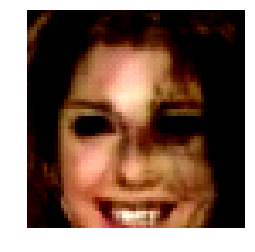

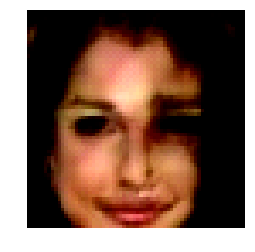

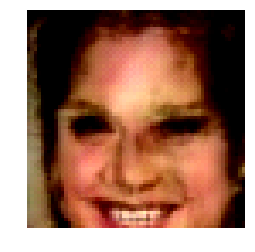

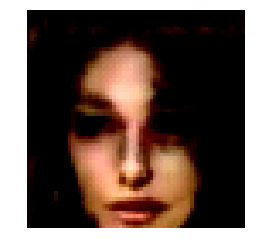

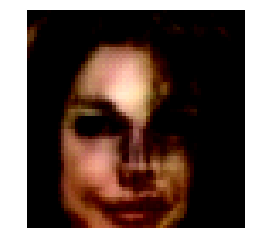

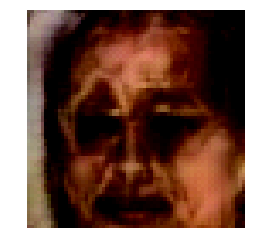

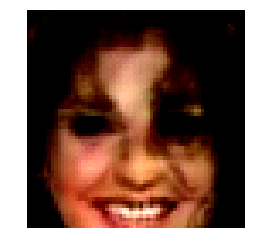

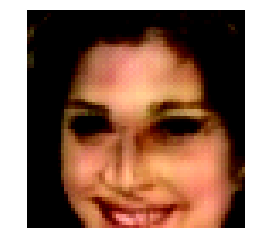

In [9]:
print(samples.shape)
for image in samples[:8]:
    plt.imshow(deprocess_image(image))
    plt.axis('off')
    plt.show()